In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

dataset_name = "music4all"
dataset_relative_location = "../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

datasets = {}

csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

# Taking a look at the datasets we have
datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

In [4]:
df_with_disruption = pd.read_csv("song_info_with_disruption.csv")
df_with_disruption.head()

,id,ni,nj,nk,disruption,artist,song,album_name,genres,popularity,release,duration_ms
0,5pClePd8cdUOGQe2,37.0,0.0,0.0,1.0,Los Espíritus,Lo Echaron del Bar,Los Espíritus,"latin,rock,psychedelic rock,latin,rock,psyched...",35.0,2013,268507
1,3MEb9LZbB80nQ1a8,1.0,0.0,0.0,1.0,Louis Armstrong,St. James Infirmary,The Complete Hot Five And Hot Seven Recordings...,"jazz,blues",29.0,1928,191867
2,7TEMzPqSHWOHiojK,93.0,0.0,0.0,1.0,Art Tatum,Tea for Two,Piano Starts Here,"jazz,jazz piano",46.0,1933,193867
3,8rCzU7kVpoJ0Z37D,1.0,0.0,0.0,1.0,Billie Holiday,A Fine Romance,Lady Day: The Complete Billie Holiday On Colum...,"jazz,jazz,blues",24.0,1933,171467
4,AHJbjIlp98gVY3Pj,2.0,0.0,0.0,1.0,Billie Holiday,Gloomy Sunday,Lady Day: The Complete Billie Holiday On Colum...,"jazz,blues,vocal jazz",49.0,1933,190800


In [5]:
listening_history = datasets["listening_history"].copy(deep=True)
listening_history.head()

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09


In [6]:
listening_history.describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_LFIMFlQR,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [81]:
df_with_disruption.query("disruption >= 0.8 & ni > 1")

,id,ni,nj,nk,disruption,artist,song,album_name,genres,popularity,release,duration_ms
0,5pClePd8cdUOGQe2,37.0,0.0,0.0,1.0,Los Espíritus,Lo Echaron del Bar,Los Espíritus,"latin,rock,psychedelic rock,latin,rock,psyched...",35.0,2013,268507
2,7TEMzPqSHWOHiojK,93.0,0.0,0.0,1.0,Art Tatum,Tea for Two,Piano Starts Here,"jazz,jazz piano",46.0,1933,193867
4,AHJbjIlp98gVY3Pj,2.0,0.0,0.0,1.0,Billie Holiday,Gloomy Sunday,Lady Day: The Complete Billie Holiday On Colum...,"jazz,blues,vocal jazz",49.0,1933,190800
7,5n2iQymPOCypEqUb,10.0,0.0,0.0,1.0,Robert Johnson,I Believe I'll Dust My Broom,King Of The Delta Blues,"blues,delta blues",35.0,1936,177200
8,7chgNvYgKK7z7gEd,9.0,0.0,0.0,1.0,Robert Johnson,Love in Vain,King Of The Delta Blues,"blues,delta blues",30.0,1936,143200
...,...,...,...,...,...,...,...,...,...,...,...,...
20985,GEE3ybh1ePDBfQmz,2.0,0.0,0.0,1.0,Starley,Call On Me - Ryan Riback Remix,Call On Me (Remixes),"house,electronic,remix,tropical house,pop",66.0,2016,222041
21085,AiWUpfc9ydUEzhpL,2.0,0.0,0.0,1.0,Enigma,Diving,The Fall Of A Rebel Angel,"new age,ambient,electronic",34.0,2016,172000
21094,8zTXvFQNj02MPDer,2.0,0.0,0.0,1.0,Bullet for My Valentine,Don't Need You - Edit,Don't Need You (Edit),"metalcore,metal,melodic metalcore,hardcore,met...",53.0,2016,267998
21958,FSPNiti89mvEGkcA,2.0,0.0,0.0,1.0,Waxahatchee,Silver,Out in the Storm,alternative rock,34.0,2017,204120


In [13]:
df_with_disruption.sort_values(["disruption", "ni"], ascending=False)

,id,ni,nj,nk,disruption,artist,song,album_name,genres,popularity,release,duration_ms
1041,7DQI6hI5KiggQHkB,657.0,0.0,0.0,1.0,Paul McCartney & Wings,Nineteen Hundred And Eighty Five,Band On The Run (Standard),"rock,classic rock",47.0,1973,331853
101,0QgrM6OrGLmgwyMO,424.0,0.0,0.0,1.0,Etta Jones,If I Had You,Don't Go To Strangers,jazz,41.0,1960,230067
276,G2wvnSj3app6kFBh,290.0,0.0,0.0,1.0,Love,Orange Skies,Da Capo (Deluxe),baroque pop,30.0,1966,170120
1618,GVCFTONiUQXTrnlb,277.0,0.0,0.0,1.0,Leonard Cohen,Fingerprints,Death Of A Ladies' Man,folk,21.0,1977,177373
1924,FhCFY3ZEjwxDcUlX,266.0,0.0,0.0,1.0,Air Supply,Every Woman in the World,Lost in Love,"soft rock,pop",49.0,1980,209600
...,...,...,...,...,...,...,...,...,...,...,...,...
21833,GmfqlzriMWuyKvz1,0.0,1.0,0.0,-1.0,The Moody Blues,The Afternoon,Nights In White Satin,"psychedelic rock,classic rock,progressive rock...",47.0,2017,249004
22776,1aCLDmOIpgFDmYEw,0.0,1.0,0.0,-1.0,IU,개여울 [Gaeyeoul] : By the stream,꽃갈피 둘 [Kkot-Galpi #2] : A flower bookmark,soul,28.0,2017,337591
23789,7Uq0RA9tb84NrimP,0.0,1.0,0.0,-1.0,Cavetown,it's u,Lemon Boy,"pop,electronic",55.0,2018,252708
24751,Ef3oLqIwwzyW6udv,0.0,1.0,0.0,-1.0,Dorian Electra,MAN to Man,Man To Man,"pop,rock,synthpop",42.0,2018,198261


In [27]:
df_with_disruption.groupby("artist").sum().sort_values(["disruption"])

,ni,nj,nk,disruption,popularity,release,duration_ms
artist,,,,,,,
Eminem,23.0,6648.0,1622662.0,-1.165852,1870.0,66279,8654886
Taco Hemingway,0.0,235.0,159064.0,-1.113066,525.0,24200,2581976
Anathema,12.0,5949.0,1928008.0,-1.104451,584.0,54301,8245577
Slaves,0.0,285.0,146580.0,-1.047420,158.0,8062,837819
IU,0.0,38.0,8749.0,-1.031409,239.0,12089,1504449
...,...,...,...,...,...,...,...
Ella Fitzgerald,337.0,201.0,9331.0,8.629829,519.0,29540,3454160
The Rolling Stones,1811.0,11791.0,447164.0,9.348867,1812.0,82996,10246293
Billie Holiday,491.0,1781.0,199205.0,10.782861,549.0,33347,3418149


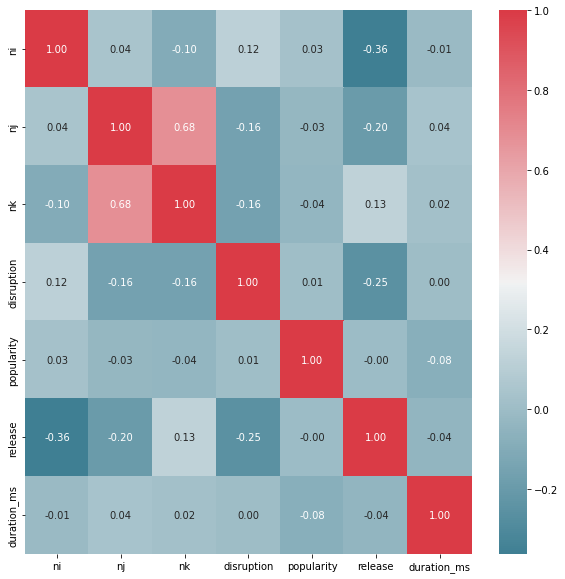

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)

   # show plot
   plt.show()


heatMap(df_with_disruption, True)

Podemos ver uma correlação negativa entre a disrupção e o ano, ou seja, músicas precursoras/antigas em seus respectivos estilos foram mais disruptivas.
Assim como a correlação negativa com o n_j e o n_k faz sentido, já que ambos estão no denominador no cálculo da disrupção

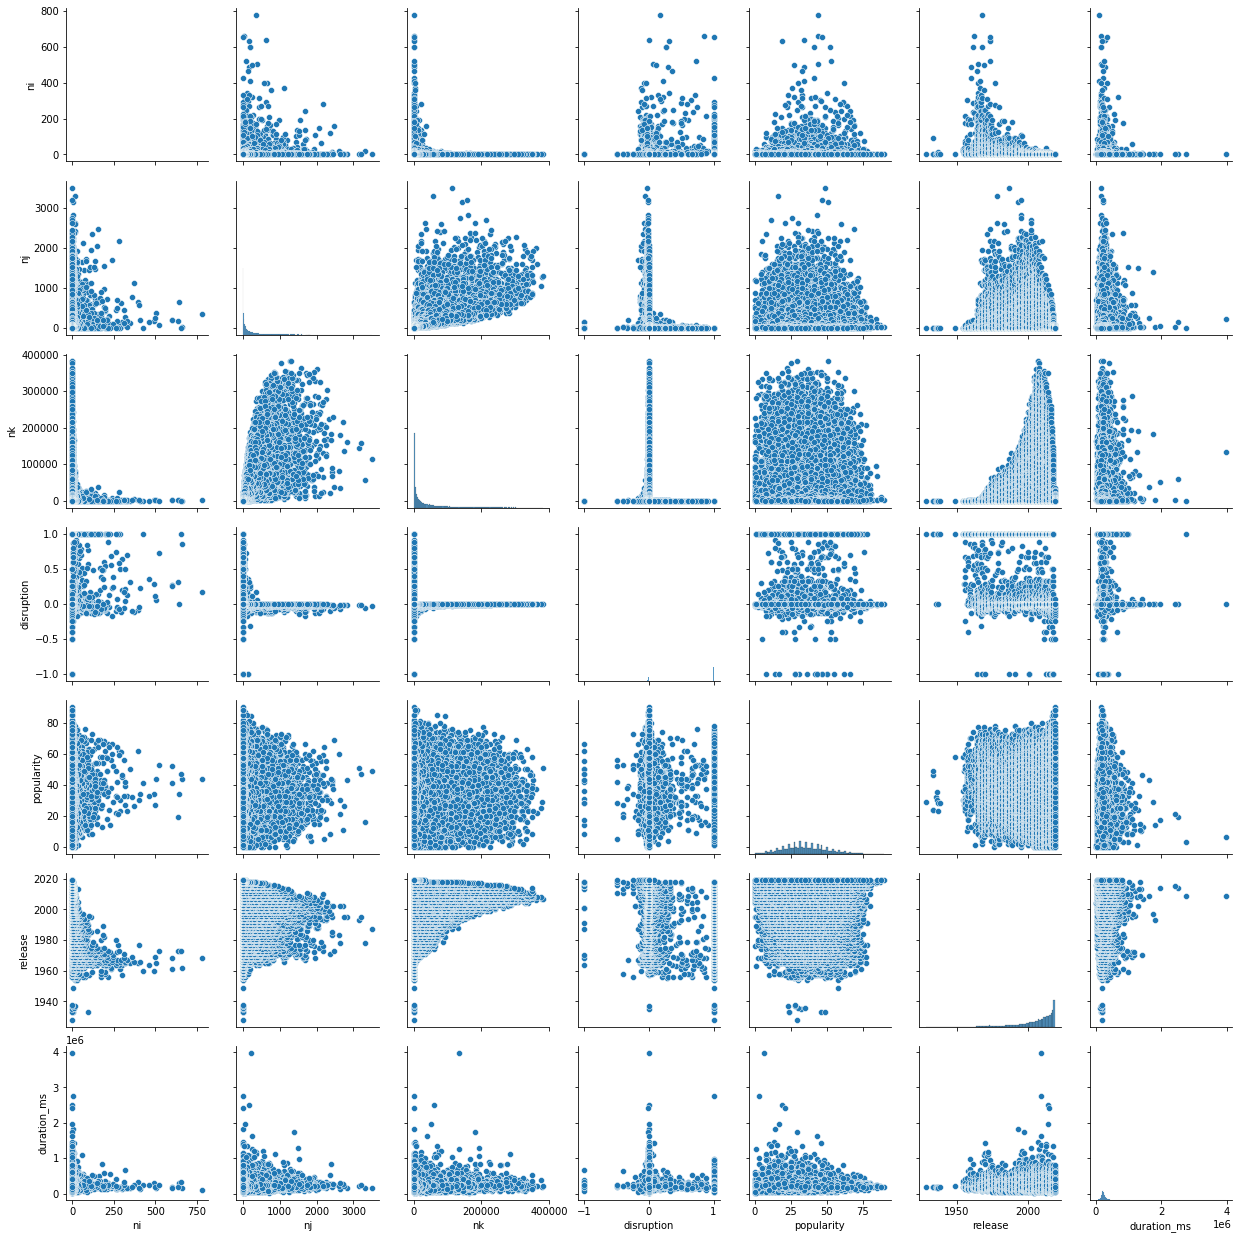

In [58]:
# Basic correlogram
sns.pairplot(df_with_disruption)

In [76]:
def num_of_genres(df):
    genres = ",".join(df['genres']).split(",")
    # That way we can count the occurrences of all genres in the dataframe
    genres_series = pd.Series(genres)
    unique_ones = genres_series.unique()
    rock = sum('rock' in s for s in unique_ones)
    pop = sum('pop' in s for s in unique_ones)
    jazz = sum('jazz' in s for s in unique_ones)
    print(f"Number of Rock Pop Jazz related Tags {rock, pop, jazz}")
    print(f"Number of unique genres in the dataset: {genres_series.nunique()}")

num_of_genres(df_with_disruption)
num_of_genres(datasets["id_genres"][:30000])
num_of_genres(datasets["id_genres"])

Number of Rock Pop Jazz related Tags (64, 64, 23)
Number of unique genres in the dataset: 641
Number of Rock Pop Jazz related Tags (67, 68, 23)
Number of unique genres in the dataset: 665
Number of Rock Pop Jazz related Tags (75, 79, 30)
Number of unique genres in the dataset: 853


In [56]:
all_users_history = listening_history.copy(deep=True)
all_users_history["timestamp"] = pd.to_datetime(all_users_history["timestamp"])

In [48]:
user_history = listening_history.query("user == 'user_007XIjOr'").sort_values(by=["timestamp"])

In [49]:
user_history["timestamp"] = pd.to_datetime(user_history["timestamp"])

In [50]:
user_history["time_diff"] = user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)

In [51]:
print(user_history.to_string())

              user              song           timestamp  time_diff
0    user_007XIjOr  DaTQ53TUmfP93FSr 2019-02-20 12:28:00        0.0
1    user_007XIjOr  dGeyvi5WCOjDU7da 2019-02-20 12:35:00        7.0
2    user_007XIjOr  qUm54NYOjeFhmKYx 2019-02-20 12:48:00       13.0
3    user_007XIjOr  FtnuMT1DlevSR2n5 2019-02-20 12:52:00        4.0
4    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:09:00       17.0
5    user_007XIjOr  LHETTZcSZLeaVOGh 2019-02-20 13:13:00        4.0
6    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:33:00       20.0
7    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:39:00        6.0
8    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:45:00        6.0
9    user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:51:00        6.0
10   user_007XIjOr  zXMHUt57MEYgpgIz 2019-02-20 13:58:00        7.0
11   user_007XIjOr  QDtAFWCvEaRwFPnC 2019-02-20 14:15:00       17.0
12   user_007XIjOr  MFVaxfkxZAUc4C8U 2019-02-20 14:20:00        5.0
13   user_007XIjOr  DhLocRBlCrB5ikDO 2019-02-20 

In [52]:
def get_cdf(df, field='time_diff'):
    res = {}
    for quantile in np.arange(0.0, 1,0.0005):
        res[quantile] = df[field].quantile(quantile)
    res_series = pd.DataFrame(pd.Series(res)).reset_index().set_index(0)
    return res_series

## Entendendo quanto tempo é uma sessão do usuário

<AxesSubplot:xlabel='0'>

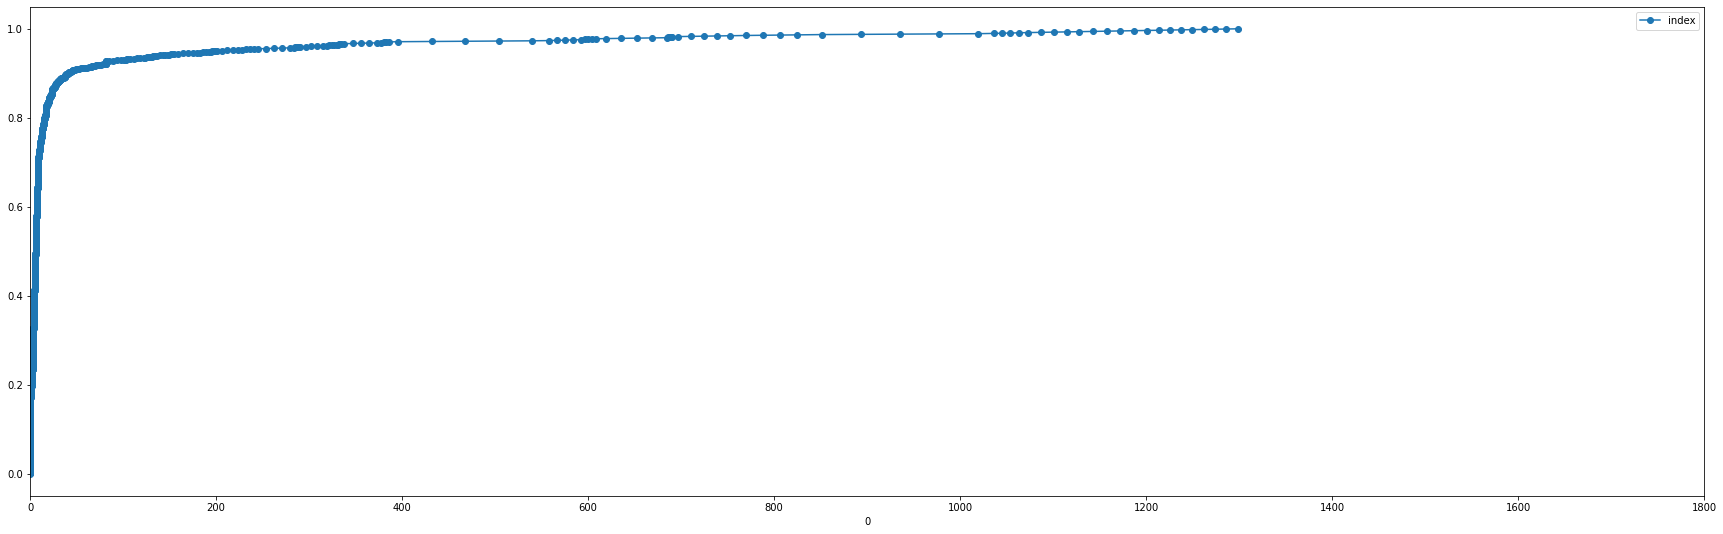

In [53]:
time_diff.plot(marker='o', figsize=(30,9), xlim=(0,1800))

In [57]:
sorted_user_history = all_users_history.sort_values(by=["user", "timestamp"])
sorted_user_history["new_user"] = sorted_user_history.user != sorted_user_history.user.shift()
sorted_user_history["time_diff"] = sorted_user_history["timestamp"].diff().dt.seconds.div(60, fill_value=0)
sorted_user_history.loc[sorted_user_history.new_user] = None

In [60]:
sorted_user_history.dropna()

,user,song,timestamp,new_user,time_diff
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35:00,0.0,7.0
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48:00,0.0,13.0
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52:00,0.0,4.0
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09:00,0.0,17.0
5,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:13:00,0.0,4.0
...,...,...,...,...,...
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57:00,0.0,9.0
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21:00,0.0,24.0
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48:00,0.0,27.0
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13:00,0.0,265.0


In [ ]:
get_cdf(sorted_user_history)